# Liz Young - Code Review - Technical Interview Presentation

<hr>

In this notebook I will walk through code I wrote to start analyzing reviews of musical instruments from Amazon purchases.

The goal of this project is to clean, transform, and organize the data to identify simple features of the reviews and summaries provided that may be predictive of the review score, and it's perceived usefulness among other shoppers. 

Additionally, this process will result in datasets prepared for building models to predict review scores and usefulness based on reviews, and summaries provided by purchasers.

I selected [this dataset](https://www.kaggle.com/datasets/eswarchandt/amazon-music-reviews?resource=download) from Kaggle, after searching for semistructured and unstructured datasets, this one resonated with me.

<hr>

I set up a private github repo tracking my progress with this project, you can find via [this link](https://github.com/completelyAbsorbed/amazon-musical-instrument-reviews), containing ...
- commits of this project from start to finish
- a progress tracker document I designed and used to execute the PACE methodology on this project
- screen captures of my git commits demonstrating competency with git, github, and commandline
- the original database sourced from Kaggle
- this Jupyter notebook
- any files produced by this notebook

<hr>

### *Thank you for your time and consideration*

<hr>

<hr>

# Import

In [2]:
# import packages and libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

<hr>

# Load Original Data

In [3]:
# define the filename where python can find the original dataset
data_filename = "Musical_instruments_reviews.csv"

# read in the original dataset to a pandas DataFrame
data_raw = pd.read_csv(data_filename)

<hr>

# Initial Inspection of Data

*Learn more about the data using methods from the pandas DataFrame type. <br> <br>
Demonstrating competency with software design pattern: Object-Oriented Programming.*

In [4]:
# look at the first 5 rows of the original dataset
print(data_raw.head())

       reviewerID        asin  \
0  A2IBPI20UZIR0U  1384719342   
1  A14VAT5EAX3D9S  1384719342   
2  A195EZSQDW3E21  1384719342   
3  A2C00NNG1ZQQG2  1384719342   
4   A94QU4C90B1AX  1384719342   

                                       reviewerName   helpful  \
0  cassandra tu "Yeah, well, that's just like, u...    [0, 0]   
1                                              Jake  [13, 14]   
2                     Rick Bennette "Rick Bennette"    [1, 1]   
3                         RustyBill "Sunday Rocker"    [0, 0]   
4                                     SEAN MASLANKA    [0, 0]   

                                          reviewText  overall  \
0  Not much to write about here, but it does exac...      5.0   
1  The product does exactly as it should and is q...      5.0   
2  The primary job of this device is to block the...      5.0   
3  Nice windscreen protects my MXL mic and preven...      5.0   
4  This pop filter is great. It looks and perform...      5.0   

                   

In [5]:
# look at the last 5 rows of the original dataset
print(data_raw.tail())

           reviewerID        asin             reviewerName helpful  \
10256  A14B2YH83ZXMPP  B00JBIVXGC          Lonnie M. Adams  [0, 0]   
10257   A1RPTVW5VEOSI  B00JBIVXGC       Michael J. Edelman  [0, 0]   
10258   AWCJ12KBO5VII  B00JBIVXGC         Michael L. Knapp  [0, 0]   
10259  A2Z7S8B5U4PAKJ  B00JBIVXGC  Rick Langdon "Scriptor"  [0, 0]   
10260  A2WA8TDCTGUADI  B00JBIVXGC          TheTerrorBeyond  [0, 0]   

                                              reviewText  overall  \
10256            Great, just as expected.  Thank to all.      5.0   
10257  I've been thinking about trying the Nanoweb st...      5.0   
10258  I have tried coated strings in the past ( incl...      4.0   
10259  Well, MADE by Elixir and DEVELOPED with Taylor...      4.0   
10260  These strings are really quite good, but I wou...      4.0   

                                                 summary  unixReviewTime  \
10256                                         Five Stars      1405814400   
10257  Long 

In [6]:
# print a summary of the size, non-null counts, and column variable types of the original dataset
print(data_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      10261 non-null  object 
 1   asin            10261 non-null  object 
 2   reviewerName    10234 non-null  object 
 3   helpful         10261 non-null  object 
 4   reviewText      10254 non-null  object 
 5   overall         10261 non-null  float64
 6   summary         10261 non-null  object 
 7   unixReviewTime  10261 non-null  int64  
 8   reviewTime      10261 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 721.6+ KB
None


The original dataset is 9 columns and 10261 rows.

The columns provided are ... 
> 'reviewerID'
    <br>    'asin'
    <br>    'reviewerName'
    <br>    'helpful'
    <br>    'reviewText'
    <br>    'overall'
    <br>    'summary'
    <br>    'unixReviewTime'
    <br>    'reviewTime'
    
The original dataset contains no Null values.

Column 'overall' is type float64, 'unixReviewTime' is type int64, the rest are type object.

The original dataset uses ~721.6 KB in memory.


In [7]:
# examine count, mean, standard deviation, minimum, maximum, and quartiles of numeric columns in the original dataset
print(data_raw.describe())

            overall  unixReviewTime
count  10261.000000    1.026100e+04
mean       4.488744    1.360606e+09
std        0.894642    3.779735e+07
min        1.000000    1.095466e+09
25%        4.000000    1.343434e+09
50%        5.000000    1.368490e+09
75%        5.000000    1.388966e+09
max        5.000000    1.405987e+09


'overall' is the reviewer's score per the [data dictionary](https://www.kaggle.com/datasets/eswarchandt/amazon-music-reviews?resource=download). It ranges from 1 to 5.

'unixReviewTime' represents unix time of the review, and is directly related to 'reviewTime' (not numeric, so not summarised here).

Next, it would be helpful to inspect each of the non-numeric columns, and ascertain their features and usefulness.

### 'reviewTime'

In [8]:
# make a subset of the original dataset consisting of the time variables for inspection
data_time = data_raw[['unixReviewTime','reviewTime']]
print(data_time.head())

   unixReviewTime   reviewTime
0      1393545600  02 28, 2014
1      1363392000  03 16, 2013
2      1377648000  08 28, 2013
3      1392336000  02 14, 2014
4      1392940800  02 21, 2014


Time that reviews are posted doesn't pertain to the content of the reviews, so it could make sense to discard both columns, though it may be convenient and useful to first segment the data into train, test, and validation splits in distinct time periods.

In [23]:
# examine the distribution of 'unixReviewTime'
print(data_time['unixReviewTime'].describe())

count    1.026100e+04
mean     1.360606e+09
std      3.779735e+07
min      1.095466e+09
25%      1.343434e+09
50%      1.368490e+09
75%      1.388966e+09
max      1.405987e+09
Name: unixReviewTime, dtype: float64


In [93]:
# define cut-points based on unixReviewTime
time_start = data_time['unixReviewTime'].min()
time_end = data_time['unixReviewTime'].max()
time_span = time_end - time_start 
time_bound_train = 1355000000
time_bound_test = 1380000000

# define indices for rows to keep in train, test, and validate splits
indices_train = np.argwhere(data_time['unixReviewTime'] < time_bound_train)
print(len(indices_train)) # 3221

indices_test = np.argwhere((data_time['unixReviewTime'] >= time_bound_train) & (data_time['unixReviewTime'] < time_bound_test))
print(len(indices_test)) # 3220

indices_validate = np.argwhere(data_time['unixReviewTime'] >= time_bound_test)
print(len(indices_validate)) # 3820



3221
3220
3820


### 'summary'

In [9]:
# examine the 'summary' variable of the original dataset
print(data_raw['summary'].head())

0                                     good
1                                     Jake
2                     It Does The Job Well
3            GOOD WINDSCREEN FOR THE MONEY
4    No more pops when I record my vocals.
Name: summary, dtype: object


'summary' is a string variable, probably shorter than 'reviewText'. It could be informative to examine the distribution of lengths of entries in 'summary'.

In [10]:
# assign the lengths of the 'summary' column to a new variable
lengths_summary = data_raw['summary'].str.len()

# print basic distributional measures of the lengths
print(lengths_summary.describe())

count    10261.000000
mean        24.348407
std         15.599231
min          1.000000
25%         13.000000
50%         21.000000
75%         32.000000
max        128.000000
Name: summary, dtype: float64


The lengths of strings in 'summary' range from 1 to 128. 

These may or may not be correlated with the review score. 

In a NLP model, it could be valuable to tokenize the 'summary' column for training.

### 'reviewText'

In [11]:
# examine the 'reviewText' variable of the original dataset
print(data_raw['reviewText'].head())

0    Not much to write about here, but it does exac...
1    The product does exactly as it should and is q...
2    The primary job of this device is to block the...
3    Nice windscreen protects my MXL mic and preven...
4    This pop filter is great. It looks and perform...
Name: reviewText, dtype: object


'reviewText' is also a string variable. As with 'summary', it may be informative to consider the lengths of these entries.

In [12]:
# assign the lengths of the 'reviewText' column to a new variable
lengths_review = data_raw['reviewText'].str.len()

# print basic distributional measures of the lengths
print(lengths_review.describe())

count    10254.000000
mean       486.260776
std        613.514024
min          9.000000
25%        163.000000
50%        285.000000
75%        552.000000
max      11310.000000
Name: reviewText, dtype: float64


The lengths of entries in 'reviewText' range in length from 9 to 11310. 

As with 'summary' this information may be useful for a model predicting the review score, and tokenizing these entries would be a step to strongly consider for an NLP model.

It may be useful to transform the length representations of 'reviewText' and 'summary' to buckets, and/or change the scale (i.e. take a logarithm of the length).

### 'helpful'

In [13]:
# examine the 'helpful' variable of the original dataset
print(data_raw['helpful'].head())

0      [0, 0]
1    [13, 14]
2      [1, 1]
3      [0, 0]
4      [0, 0]
Name: helpful, dtype: object


The 'helpful' column contains pairs of numbers, the first representing number of people who found the review helpful, with the second representing the total number of people who responded to a prompt asking whether or not the review was helpful.

This column could be transformed into multiple new variables that could be informative for predicting the review score such as; number of responses, portion of responses asserting the review was helpful, portion of responses asserting the review was not helpful.

These new variables could also be useful targets for a machine-learning model.

It may be informative to explore the relation between these variables and the 'overall' review score.

Before moving on, write functions to decompose 'helpful' into integers. *(functional programming)*

In [14]:
# define a function to decompose 'string_pair' into integers
def decompose_string_pair(string_pair) : 
    """
    Decompose a single string into a pair of integers
    
        Parameters:
            string_pair (str): a string representing a pair of integers, i.e. "[13, 14]"
        
        Returns:
            found_helpful (int): an integer representing the number that found the review helpful
            total_helpful (int): an integer representing the total number that responded helpful or not
            
        References:
            https://stackoverflow.com/questions/17416132/extracting-integers-from-a-string-of-ordered-pairs-in-python
    """
    # split the string and remove brackets and comma via list comprehension
    found_helpful, total_helpful = (int(string_split.strip("[],")) for string_split in string_pair.split())
    return(found_helpful, total_helpful)

# define a function to decompose 'helpful' into integers
def decompose_helpful(helpful) : 
    """
    Decompose the 'helpful' column into two values.
    
        Parameters:
            helpful (str): a Series of strings representing pairs of integers, i.e. "[13, 14]"
        
        Returns:
            count_found_helpful (tuple): a tuple of integers representing the number that found the review helpful
            count_total_helpful (tuple): a tuple of integers representing the total number that responded helpful or not
            
        References:
            https://stackoverflow.com/questions/42376201/how-can-i-get-multiple-lists-as-separate-results-from-a-list-comprehension
    """
    # perform a list comprehension on the variable helpful, using decompose_string_pair function
    count_found_helpful, count_total_helpful = zip(*[decompose_string_pair(string_pair) for string_pair in helpful])
    return(count_found_helpful, count_total_helpful)


In [15]:
# derive the new integer variables represented in 'helpful'
count_found_helpful, count_total_helpful = decompose_helpful(data_raw['helpful'])

# examine the head of each of the derived variables
print(count_found_helpful[0:5])
print(count_total_helpful[0:5])

(0, 13, 1, 0, 0)
(0, 14, 1, 0, 0)


### 'reviewerName'

In [16]:
# examine the 'reviewerName' variable of the original dataset
print(data_raw['reviewerName'].head())

0    cassandra tu "Yeah, well, that's just like, u...
1                                                Jake
2                       Rick Bennette "Rick Bennette"
3                           RustyBill "Sunday Rocker"
4                                       SEAN MASLANKA
Name: reviewerName, dtype: object


While the reviewer name may be useful in certain contexts, it makes sense to drop this column for the initial approach to modeling, as it does not pertain to the content or helpfulness of the review itself.

### 'asin'

In [17]:
# examine the 'asin' variable of the original dataset
print(data_raw['asin'].head())
print(data_raw['asin'].tail())

0    1384719342
1    1384719342
2    1384719342
3    1384719342
4    1384719342
Name: asin, dtype: object
10256    B00JBIVXGC
10257    B00JBIVXGC
10258    B00JBIVXGC
10259    B00JBIVXGC
10260    B00JBIVXGC
Name: asin, dtype: object


The column 'asin' represents the product ID, as per the data dictionary from Kaggle. This variable may be useful for splitting train-test-validate, but review time has already been selected as the basis for this initial exploration. For a peak into areas that may be worth exploring more, it would be good to examine the distribution of the counts of 'asin'.

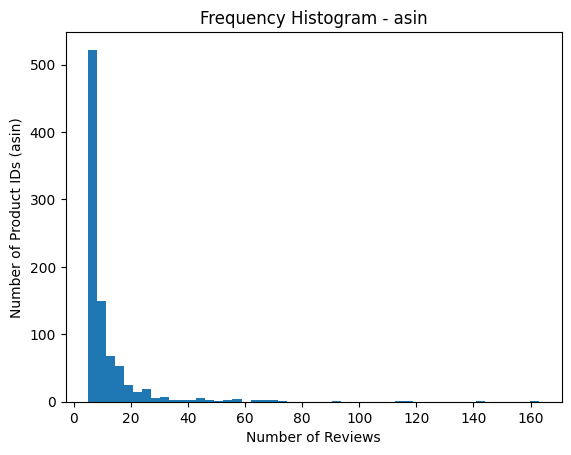

count    900.000000
mean      11.401111
std       12.933655
min        5.000000
25%        6.000000
50%        8.000000
75%       12.000000
max      163.000000
Name: count, dtype: float64

In [18]:
# plot the frequency distribution of the variable 'asin'

plt.hist(data_raw['asin'].value_counts(),
        bins = 50)
plt.ylabel('Number of Product IDs (asin)')
plt.xlabel('Number of Reviews')
plt.title('Frequency Histogram - asin')
plt.show()

# print basic distributional measures
data_raw['asin'].value_counts().describe()

Each product ID (asin) has at least 5 reviews in the database. While this project will split train-test-validate based on time, another valid approach could be to split based on asin, either ensuring that train-test-validate each have at least one of each, or alternatively splitting so that product IDs are distinct among the training, testing, and validating sets. 

### 'reviewerID'

In [19]:
# examine the 'reviewerID' variable of the original dataset
print(data_raw['reviewerID'].head())
print(data_raw['reviewerID'].tail())

0    A2IBPI20UZIR0U
1    A14VAT5EAX3D9S
2    A195EZSQDW3E21
3    A2C00NNG1ZQQG2
4     A94QU4C90B1AX
Name: reviewerID, dtype: object
10256    A14B2YH83ZXMPP
10257     A1RPTVW5VEOSI
10258     AWCJ12KBO5VII
10259    A2Z7S8B5U4PAKJ
10260    A2WA8TDCTGUADI
Name: reviewerID, dtype: object


The column 'reviewerID' is redundant with the column 'reviewerName', which has been deemed irrelevant for this project, and 'reviewerName' would be more useful if included in a model, i.e. if someone has the username "grumpy_purchaser_dislikes_oboes", an NLP model may be able to surmise their bias against oboes.

It could also be informative to examine the frequency distribution of reviewers.

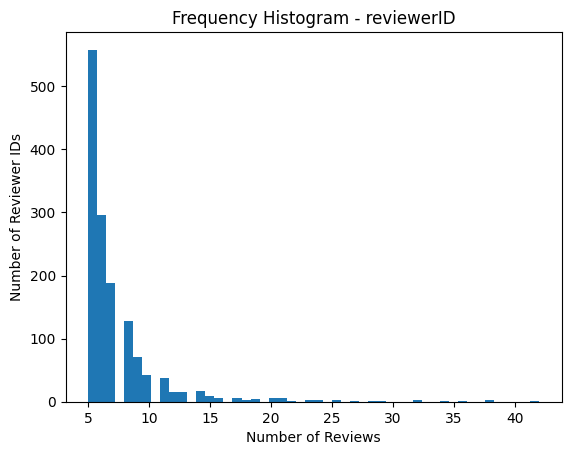

count    1429.000000
mean        7.180546
std         3.731858
min         5.000000
25%         5.000000
50%         6.000000
75%         8.000000
max        42.000000
Name: count, dtype: float64

In [20]:
# plot the frequency distribution of the variable 'reviewerID'

plt.hist(data_raw['reviewerID'].value_counts(),
        bins = 50)
plt.ylabel('Number of Reviewer IDs')
plt.xlabel('Number of Reviews')
plt.title('Frequency Histogram - reviewerID')
plt.show()

# print basic distributional measures
data_raw['reviewerID'].value_counts().describe()

Similar to 'asin', there are at least 5 reviews per reviewer in the database, which in an alternate approach could provide a different basis for train-test-validate split.

<hr>

# Clean The Data

This project aims to identify simple features of the reviews and summaries provided that may be predictive of the review score, and it's perceived usefulness among other shoppers. 

A more robust project could be insightful on this data, for example, an NLP model that tokenizes reviews, summaries, and even reviewer names for the purpose of predicting review score and/or usefulness perceived by other shoppers.

Another area of exploration a more robust should consider is timing of review, as well as the review history of reviewers.

In this portion of the project, the raw data will be cleaned, transformed, and features irrelevant to the present goal will be discarded.

### Identify Variables That Are Irrelevant To This Project And Will Be Dropped

As per initial inspection, the following variables will be discarded without further consideration : 
- reviewerID
- asin
- reviewerName
- unixReviewTime
- reviewTime

### Variables That Will Be Transformed

The following variables will be transformed : 
- helpful - will be transformed into three representing (A) percent helpful (B) percent unhelpful (C) number of shoppers that gave feedback on this review
- reviewText - will be transformed into the length of the review provided
- summary - will be transformed into the length of the summary provided

### Variables That Will Be Kept

- overall - the review score will be kept, as is.

### Transform Data

In [21]:
# prepare transformed columns
# 
# lengths_review, lengths_summary, count_found_helpful, and count_total_helpful were prepared earlier in this notebook

# cast variables to lists
list_found_helpful = list(count_found_helpful)
list_total_helpful = list(count_total_helpful)

# make a DataFrame
dataframe_helpful = pd.DataFrame(list(zip(list_found_helpful, 
                                          list_total_helpful)),
                                columns = ['found', 
                                           'total'])

# derive percent_helpful
percent_helpful = np.where(dataframe_helpful['total'] == 0, 
                           0, 
                           dataframe_helpful['found'] / dataframe_helpful['total'])

# derive percent_unhelpful
percent_unhelpful = np.where(dataframe_helpful['total'] == 0, 
                             0, 
                             1 - (dataframe_helpful['found'] / dataframe_helpful['total']))

# examine the head of newly derived variables
print(percent_helpful[0:5])
print(percent_unhelpful[0:5])


[0.         0.92857143 1.         0.         0.        ]
[0.         0.07142857 0.         0.         0.        ]


### Construct Cleaned DataFrame

In [22]:
# construct a pandas DataFrame from the selected, cleaned, and transformed data
data_clean = pd.DataFrame(list(zip(lengths_review, 
                                   lengths_summary, 
                                   percent_helpful, 
                                   percent_unhelpful, 
                                   count_total_helpful, 
                                   data_raw['overall'])),
                         columns = ['lengths_review',
                                   'lengths_summary',
                                   'helpful',
                                   'unhelpful',
                                   'total_helpful',
                                   'review'])

# examine the head of the cleaned DataFrame
print(data_clean.head())

   lengths_review  lengths_summary   helpful  unhelpful  total_helpful  review
0           268.0                4  0.000000   0.000000              0     5.0
1           544.0                4  0.928571   0.071429             14     5.0
2           436.0               20  1.000000   0.000000              1     5.0
3           206.0               29  0.000000   0.000000              0     5.0
4           159.0               37  0.000000   0.000000              0     5.0


<hr>

# Split The Data Based On Time Into Train-Test-Validate

In [114]:
# flatten a list of lists : https://stackoverflow.com/questions/952914/how-do-i-make-a-flat-list-out-of-a-list-of-lists

# split out training data
list_indices_train = [item for sublist in indices_train for item in sublist] # flatten list of lists (see reference above)
data_train = data_clean.loc[list_indices_train]
print(data_train.head())

# split out testing data
list_indices_test = [item for sublist in indices_test for item in sublist] # flatten list of lists (see reference above)
data_test = data_clean.loc[list_indices_test]
print(data_test.head())

# split out validation data
list_indices_validate = [item for sublist in indices_validate for item in sublist] # flatten list of lists (see reference above)
data_validate = data_clean.loc[list_indices_validate]
print(data_validate.head())

    lengths_review  lengths_summary  helpful  unhelpful  total_helpful  review
7            845.0               34      0.0        0.0              0     3.0
8            201.0               11      0.0        0.0              0     5.0
10          1076.0               50      1.0        0.0              6     5.0
20           638.0               35      0.0        0.0              0     4.0
22           159.0               12      0.0        0.0              0     4.0
    lengths_review  lengths_summary   helpful  unhelpful  total_helpful  \
1            544.0                4  0.928571   0.071429             14   
2            436.0               20  1.000000   0.000000              1   
5            234.0               14  0.000000   0.000000              0   
13            95.0                7  0.000000   0.000000              0   
14           104.0                9  0.000000   0.000000              0   

    review  
1      5.0  
2      5.0  
5      5.0  
13     5.0  
14     5.0

<hr>

# Exploratory Data Analysis

Now that train, test, and validate are separated, do some exploratory data analysis on the training data. The purpose for doing this split is to avoid overconfidence and bias via data-leakage.

In [119]:
# what is the correlation between 'helpful' and 'review'?
corr_helpful_review = data_train['review'].corr(data_train['helpful'])
print(corr_helpful_review) # -0.0409

####################################################################################

# what is the correlation between 'total_helpful' and 'review'?
corr_total_helpful_review = data_train['review'].corr(data_train['total_helpful'])
print(corr_total_helpful_review) # -0.0839

# what is the correlation between 'lengths_summary' and 'review'?
corr_lengths_summary_review = data_train['review'].corr(data_train['lengths_summary'])
print(corr_lengths_summary_review) # -0.0919

# what is the correlation between 'lengths_review' and 'review'?
corr_lengths_review_review = data_train['review'].corr(data_train['lengths_review'])
print(corr_lengths_review_review) # -0.0950

####################################################################################

# what is the correlation between 'total_helpful' and 'helpful'?
corr_total_helpful_helpful = data_train['helpful'].corr(data_train['total_helpful'])
print(corr_total_helpful_helpful) # 0.2570

# what is the correlation between 'lengths_summary' and 'helpful'?
corr_lengths_summary_helpful = data_train['helpful'].corr(data_train['lengths_summary'])
print(corr_lengths_summary_helpful) # 0.1338

# what is the correlation between 'lengths_review' and 'helpful'?
corr_lengths_review_helpful = data_train['helpful'].corr(data_train['lengths_review'])
print(corr_lengths_review_helpful) # 0.2992

-0.04092150542482939
-0.08390720272566793
-0.09194259292134135
-0.09499999387255245
0.2569047698946612
0.1338033767946394
0.2922868527666187


Text(0, 0.5, 'lengths_review')

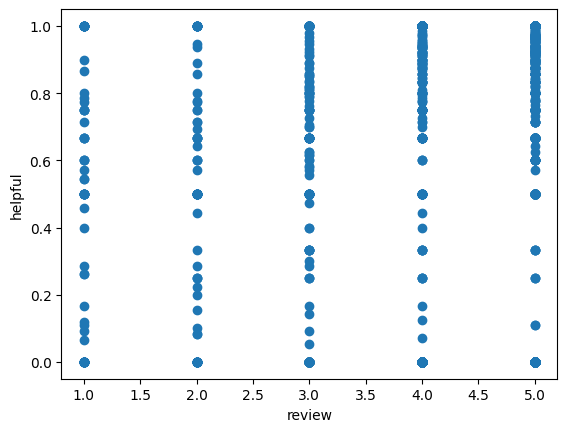

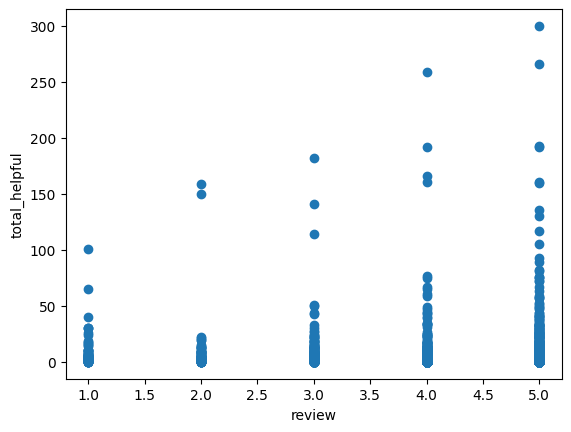

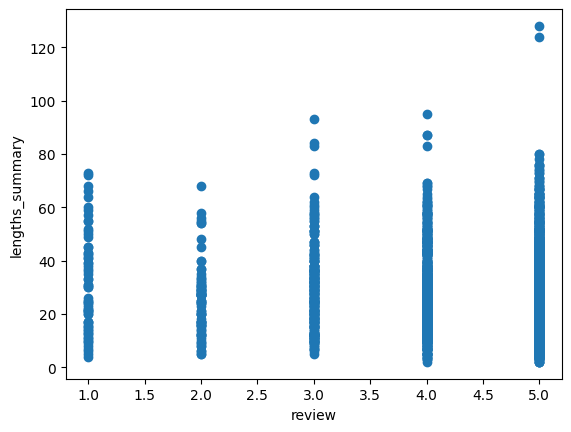

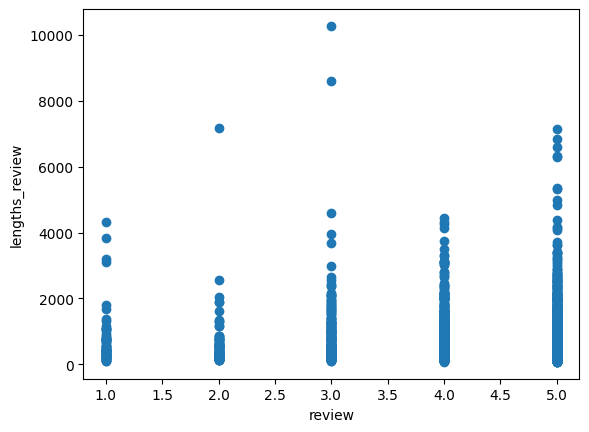

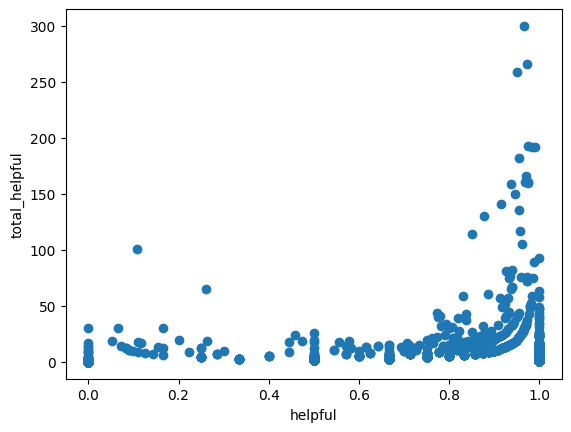

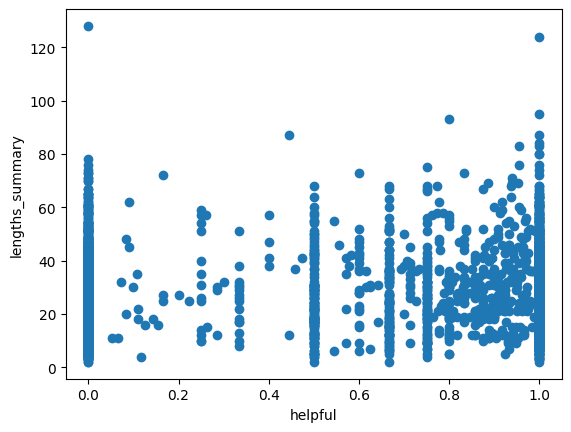

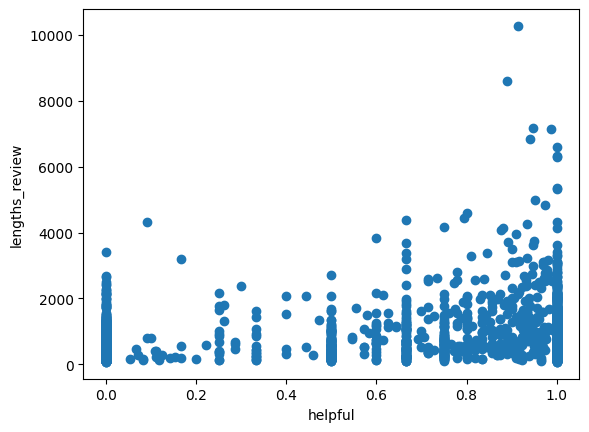

In [132]:
# plot relationships
variable_x = 'review'
variable_y = 'helpful'
plot_examine = data_train.plot(x = variable_x,
                               y = variable_y,
                               style = "o",
                               legend = False)
plot_examine.set_xlabel(variable_x)
plot_examine.set_ylabel(variable_y)

######################################################

variable_x = 'review'
variable_y = 'total_helpful'
plot_examine = data_train.plot(x = variable_x,
                               y = variable_y,
                               style = "o",
                               legend = False)
plot_examine.set_xlabel(variable_x)
plot_examine.set_ylabel(variable_y)

variable_x = 'review'
variable_y = 'lengths_summary'
plot_examine = data_train.plot(x = variable_x,
                               y = variable_y,
                               style = "o",
                               legend = False)
plot_examine.set_xlabel(variable_x)
plot_examine.set_ylabel(variable_y)

variable_x = 'review'
variable_y = 'lengths_review'
plot_examine = data_train.plot(x = variable_x,
                               y = variable_y,
                               style = "o",
                               legend = False)
plot_examine.set_xlabel(variable_x)
plot_examine.set_ylabel(variable_y)

######################################################

variable_x = 'helpful'
variable_y = 'total_helpful'
plot_examine = data_train.plot(x = variable_x,
                               y = variable_y,
                               style = "o",
                               legend = False)
plot_examine.set_xlabel(variable_x)
plot_examine.set_ylabel(variable_y)

variable_x = 'helpful'
variable_y = 'lengths_summary'
plot_examine = data_train.plot(x = variable_x,
                               y = variable_y,
                               style = "o",
                               legend = False)
plot_examine.set_xlabel(variable_x)
plot_examine.set_ylabel(variable_y)

variable_x = 'helpful'
variable_y = 'lengths_review'
plot_examine = data_train.plot(x = variable_x,
                               y = variable_y,
                               style = "o",
                               legend = False)
plot_examine.set_xlabel(variable_x)
plot_examine.set_ylabel(variable_y)



# Initial Findings

- 'helpful' and 'review' have a relatively low correlation
- prepared variables have a modest correlation with 'review'
- prepared variables have a high correlation with 'helpful'
- examining correlations with 'helpful', the lengths_summary has a curious clump of highly helpful reviews with summaries in the band of lengths between ~10 and ~50 characters
- the more shoppers that responded indicating whether a review is helpful or not, the more likely that review was helpful
- length of review and summary each have a moderate negative correlation with review score
- length of summary has a strong positive correlation with helpfulness
- length of review has a very strong positive correlation with helpfulness

# Next Steps

- decide on any further data processing
- decide on targets to predict
- design and implement Machine Learning workflows
- summarize findings and deliver to stakeholders
- invite comments, questions, clarifications, and follow-ups

### *Thank You*